In [49]:
import numpy as np 
import pandas as pd
import  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
cd F:\Vaibhavi\Data science\Python\Machine Learing

F:\Vaibhavi\Data science\Python\Machine Learing


In [3]:
df=pd.read_csv('airline.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,3.240300,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,1.350755,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
df.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             26
satisfaction                          0
dtype: int64

In [9]:
df.dropna(axis=0,how='any',inplace=True)

In [10]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()

In [12]:
lst = ['Customer Type','Gender','Type of Travel','Class','satisfaction']
for i in lst:
    df[i] = le.fit_transform(df[i])

In [13]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

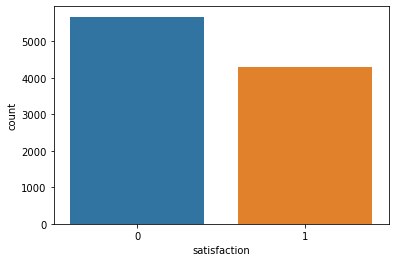

In [14]:
sns.countplot(x='satisfaction',data=df)

<AxesSubplot:xlabel='Flight Distance'>

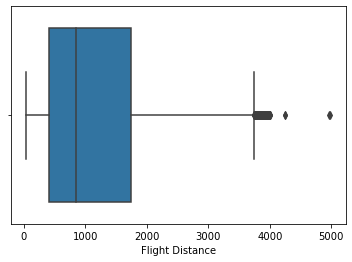

In [15]:
sns.boxplot(df['Flight Distance'])

<AxesSubplot:xlabel='Checkin service'>

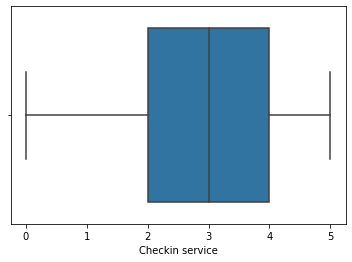

In [16]:
sns.boxplot(df['Checkin service'])

<AxesSubplot:xlabel='Class', ylabel='satisfaction'>

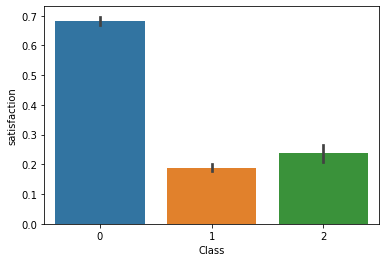

In [17]:
sns.barplot(x='Class',y='satisfaction',data=df)

<AxesSubplot:>

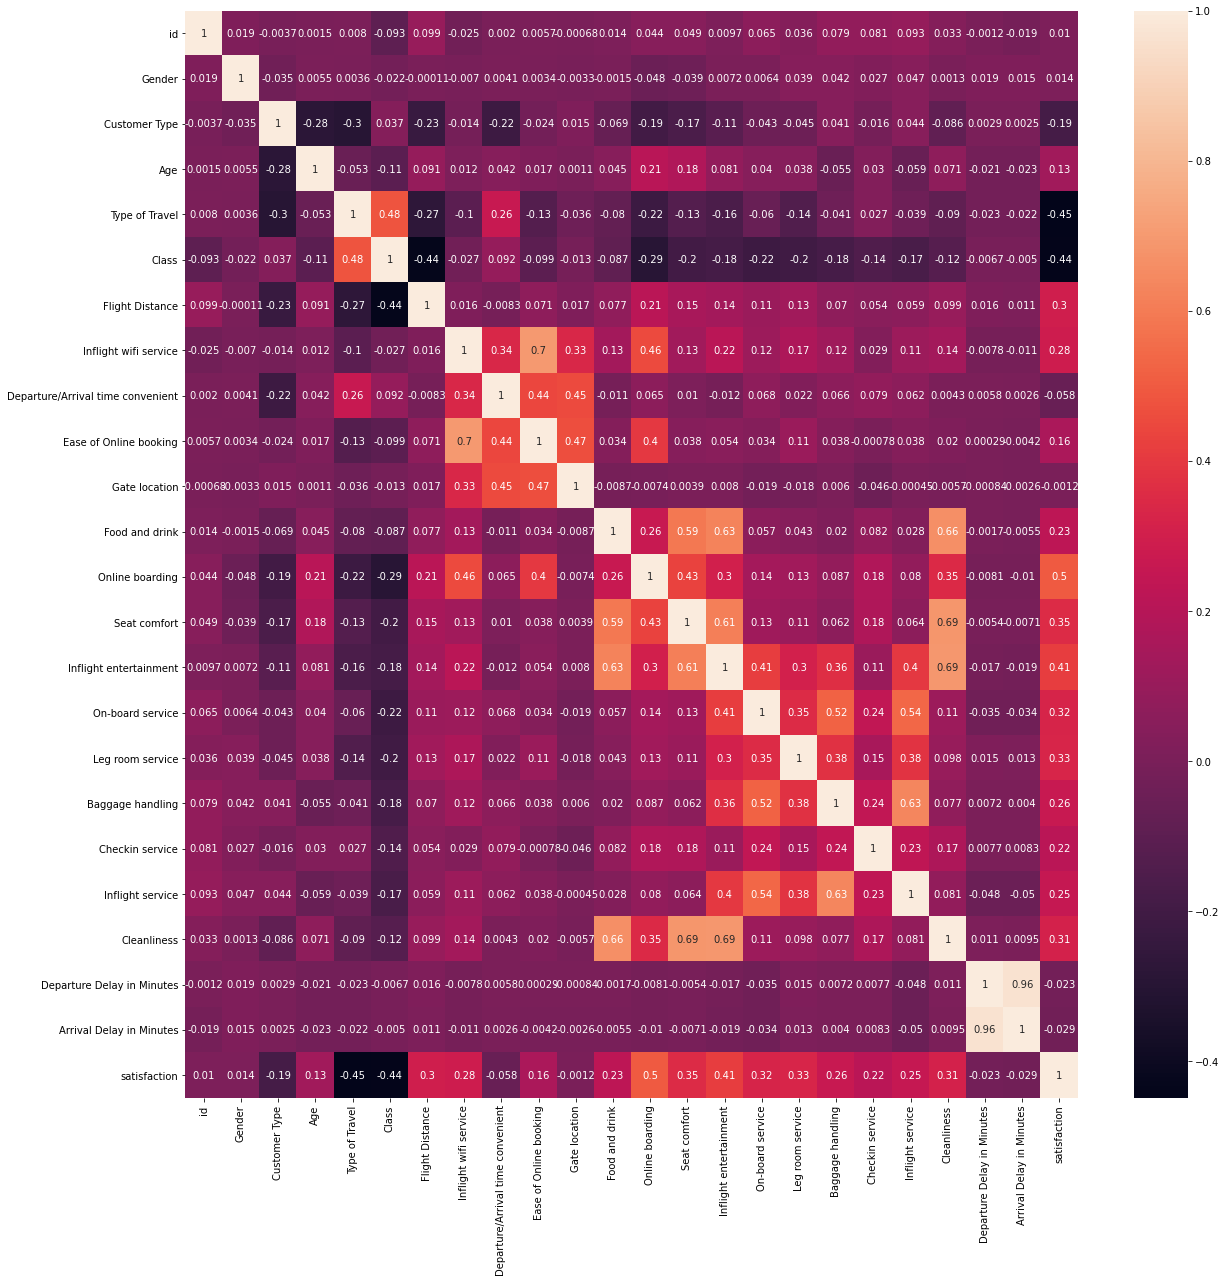

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [19]:
df['Flight Distance'].unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443], dtype=int64)

In [20]:
df.drop('id',axis=1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,50,0,0,3599,3,3,3,3,...,5,5,5,5,5,5,4,12,24.0,1
9996,1,0,38,0,0,3873,5,5,5,5,...,4,4,4,4,3,4,5,0,0.0,1
9997,0,0,39,0,0,319,4,4,4,4,...,4,4,4,4,3,4,2,0,0.0,1
9998,1,0,52,0,0,1363,5,5,5,5,...,4,4,3,4,5,4,5,1,11.0,1


In [21]:
x=df.drop('satisfaction',axis=1)

In [22]:
y=df['satisfaction']

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()

In [25]:
x_scal=scaler.fit_transform(x)

In [26]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.2,random_state=0)

In [28]:
x_train.shape,y_train.shape

((7979, 23), (7979,))

In [29]:
x_test.shape,y_test.shape

((1995, 23), (1995,))

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [46]:
dt=DecisionTreeClassifier()

In [47]:
param = {
    'criterion':['gini','entropy'],
    'max_depth':[5,10,15,20,25,50],
    'splitter':['best','random'],
    'min_samples_split':[2,4,6,8],
    'max_leaf_nodes':[2,4,6,8],
    'random_state':[0,4,7,9,20,30,42]
}

In [62]:
cv=GridSearchCV(dt,param,cv=5)

In [63]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=8,
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 50],
                         'max_leaf_nodes': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [0, 4, 7, 9, 20, 30, 42],
                         'splitter': ['best', 'random']})

In [64]:
dt=cv.best_estimator_

In [65]:
y_pred=dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [66]:
accuracy_score(y_pred,y_test)

0.8882205513784461